# Plot the distributions and compare with root file's result
---

In [1]:
import pylhe 
import ROOT 
import uproot 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math

Welcome to JupyROOT 6.20/04


## LHE checking section
---

In [2]:
def invariant_mass(p1,p2):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','px','py','pz']))

def transvers_mass(p1):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','pz']))

process_path = './unweighted_events.lhe' 

ttbar = pylhe.readLHE(process_path)

m, mT, event_list = [], [], []

for event in ttbar:
    m.append(invariant_mass( event.particles[5],event.particles[8]) )
    #mT.append(transvers_mass(event.particles[-3]))
    event_list.append(event)
    
m, mT = np.array(m), np.array(mT)

In [3]:
print("{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}".format("#","id","mother1","mother2","e","px","py","pz","status"))
ID = []
M1 = []
M2 = []
Eng = []
px = []
py = []
pz = []
mass = []

for i in range(0,10000):
    _ID = []
    _M1 = []
    _M2 = []
    _Eng = []
    _px = []
    _py = []
    _pz = []
    _mass = []
    for j, element in enumerate(event_list[i].particles):
        _ID.append(element.id)
        _M1.append(element.mother1)
        _M2.append(element.mother2)
        _Eng.append(element.e)
        _px.append(element.px)
        _py.append(element.py)
        _pz.append(element.pz)
        _mass.append(element.m)
    ID.append(_ID)
    M1.append(_M1)
    M2.append(_M2)
    Eng.append(_Eng)
    px.append(_px)
    py.append(_py)
    pz.append(_pz)
    mass.append(_mass)

#         id      mother1     mother2        e           px          py          pz        status   


In [4]:
sum_top_invariant_mass_1 = 0
sum_top_invariant_mass_2 = 0
for i in range(0, 10):
    print("+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+")
    data = {
        "ID:": ID[i],
        "M1": M1[i],
        "M2": M2[i],
        "energy": Eng[i],
        "px": px[i],
        "py": py[i],
        "pz": pz[i],
        "mass": mass[i]}
    df = pd.DataFrame(data)
    print(df)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
     ID:   M1   M2      energy          px         py          pz        mass
0   21.0  0.0  0.0  658.579572    0.000000   0.000000  658.579572    0.000000
1   21.0  0.0  0.0   82.852684   -0.000000  -0.000000  -82.852684    0.000000
2   -6.0  1.0  2.0  337.022154 -153.105956  21.758771  244.583264  172.765973
3  -24.0  3.0  3.0  219.296850  -96.013953  81.866796  161.128570   78.789851
4    6.0  1.0  2.0  404.410102  153.105956 -21.758771  331.143624  173.137382
5   24.0  5.0  5.0  321.471768  117.460544 -74.163674  277.853776   82.729361
6    2.0  6.0  6.0  297.603339  111.880945 -89.829251  260.731868    0.000000
7   -1.0  6.0  6.0   23.868430    5.579599  15.665577   17.121907    0.000000
8    5.0  5.0  5.0   82.938333   35.645412  52.404903   53.289848    4.700000
9    3.

In [5]:
inv_W = np.zeros([10000])
inv_top = np.zeros([10000])
inv_top_compare = np.zeros([10000])
inv_W_bar = np.zeros([10000])
inv_top_bar = np.zeros([10000])
inv_top_bar_compare = np.zeros([10000])
parton_1_eta = np.zeros([10000])
parton_1_phi = np.zeros([10000])
parton_2_eta = np.zeros([10000])
parton_2_phi = np.zeros([10000])
parton_3_eta = np.zeros([10000])
parton_3_phi = np.zeros([10000])
parton_4_eta = np.zeros([10000])
parton_4_phi = np.zeros([10000])
b_eta = np.zeros([10000])
b_phi = np.zeros([10000])
b_bar_eta =np.zeros([10000])
b_bar_phi = np.zeros([10000])

for i in range(0, 10000):
    #print("+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+")
    #print(i)
    data = {
        "ID:": ID[i],
        "M1": M1[i],
        "M2": M2[i],
        "energy": Eng[i],
        "px": px[i],
        "py": py[i],
        "pz": pz[i],
        "mass": mass[i]}
    df = pd.DataFrame(data)

    q_ID_tmp = []
    q_eng_tmp = []  
    q_px_tmp = []
    q_py_tmp = []
    q_pz_tmp = []
    q_eta_tmp = []
    q_phi_tmp = []
    q_mass_tmp = []

    W_or_b_ID_tmp = []
    W_or_b_eng_tmp = []  
    W_or_b_px_tmp = []
    W_or_b_py_tmp = []
    W_or_b_pz_tmp = []
    W_or_b_eta_tmp = []
    W_or_b_phi_tmp = []
    W_or_b_mass_tmp = []

    q_bar_ID_tmp = []
    q_bar_eng_tmp = []  
    q_bar_px_tmp = []
    q_bar_py_tmp = []
    q_bar_pz_tmp = []
    q_bar_eta_tmp = []
    q_bar_phi_tmp = []
    q_bar_mass_tmp = []

    W_or_b_bar_ID_tmp = []
    W_or_b_bar_eng_tmp = []  
    W_or_b_bar_px_tmp = []
    W_or_b_bar_py_tmp = []
    W_or_b_bar_pz_tmp = []
    W_or_b_bar_eta_tmp = []
    W_or_b_bar_phi_tmp = []
    W_or_b_bar_mass_tmp = []

    inv_W_tmp = 0
    inv_top_tmp = 0 
    inv_top_compare_tmp = 0

    inv_W_bar_tmp = 0
    inv_top_bar_tmp = 0 
    inv_top_bar_compare_tmp = 0
    for j in range(len(df)):
        if df.iloc[int(df.iloc[j,1])-1, 0] == 24:
            q_ID_tmp.append(df.iloc[j,0])
            q_eng_tmp.append(df.iloc[j, 3])
            q_px_tmp.append(df.iloc[j, 4])
            q_py_tmp.append(df.iloc[j, 5])
            q_pz_tmp.append(df.iloc[j, 6])
            q_mass_tmp.append(df.iloc[j, 7])
            q_eta_tmp.append( np.arcsinh(df.iloc[j, 6]/df.iloc[j, 3]) )
            q_phi_tmp.append( np.arccos(df.iloc[j, 4]/df.iloc[j, 3]) )
        elif df.iloc[int(df.iloc[j,1])-1, 0] == 6:
            W_or_b_ID_tmp.append(df.iloc[j,0])
            W_or_b_eng_tmp.append(df.iloc[j, 3])
            W_or_b_px_tmp.append(df.iloc[j, 4])
            W_or_b_py_tmp.append(df.iloc[j, 5])
            W_or_b_pz_tmp.append(df.iloc[j, 6])
            W_or_b_mass_tmp.append(df.iloc[j, 7])
            W_or_b_eta_tmp.append( np.arcsinh(df.iloc[j, 6]/df.iloc[j, 3]) )
            W_or_b_phi_tmp.append( np.arccos(df.iloc[j, 4]/df.iloc[j, 3]) )
        else : pass

        if df.iloc[int(df.iloc[j,1])-1, 0] == -24:
            q_bar_ID_tmp.append(df.iloc[j,0])
            q_bar_eng_tmp.append(df.iloc[j, 3])
            q_bar_px_tmp.append(df.iloc[j, 4])
            q_bar_py_tmp.append(df.iloc[j, 5])
            q_bar_pz_tmp.append(df.iloc[j, 6])
            q_bar_mass_tmp.append(df.iloc[j, 7])
            q_bar_eta_tmp.append( np.arcsinh(df.iloc[j, 6]/df.iloc[j, 3]) )
            q_bar_phi_tmp.append( np.arccos(df.iloc[j, 4]/df.iloc[j, 3]) )
        elif df.iloc[int(df.iloc[j,1])-1, 0] == -6:
            W_or_b_bar_ID_tmp.append(df.iloc[j,0])
            W_or_b_bar_eng_tmp.append(df.iloc[j, 3])
            W_or_b_bar_px_tmp.append(df.iloc[j, 4])
            W_or_b_bar_py_tmp.append(df.iloc[j, 5])
            W_or_b_bar_pz_tmp.append(df.iloc[j, 6])
            W_or_b_bar_mass_tmp.append(df.iloc[j, 7])
            W_or_b_bar_eta_tmp.append( np.arcsinh(df.iloc[j, 6]/df.iloc[j, 3]) )
            W_or_b_bar_phi_tmp.append( np.arccos(df.iloc[j, 4]/df.iloc[j, 3]) )
        else : pass
    if q_ID_tmp[0] > 0:
        parton_1_eta[i] = q_eta_tmp[0]
        parton_1_phi[i] = q_phi_tmp[0]
        parton_2_eta[i] = q_eta_tmp[1]
        parton_2_phi[i] = q_phi_tmp[1]
    else :
        parton_1_eta[i] = q_eta_tmp[1]
        parton_1_phi[i] = q_phi_tmp[1]
        parton_2_eta[i] = q_eta_tmp[0]
        parton_2_phi[i] = q_phi_tmp[0]

    if q_bar_ID_tmp[0] > 0:
        parton_3_eta[i] = q_bar_eta_tmp[0]
        parton_3_phi[i] = q_bar_phi_tmp[0]
        parton_4_eta[i] = q_bar_eta_tmp[1]
        parton_4_phi[i] = q_bar_phi_tmp[1]
    else :
        parton_3_eta[i] = q_bar_eta_tmp[1]
        parton_3_phi[i] = q_bar_phi_tmp[1]
        parton_4_eta[i] = q_bar_eta_tmp[0]
        parton_4_phi[i] = q_bar_phi_tmp[0]

    if W_or_b_ID_tmp[0] == 5 :
        b_eta[i] = W_or_b_eta_tmp[0]
        b_phi[i] = W_or_b_phi_tmp[0]
    else :
        b_eta[i] = W_or_b_eta_tmp[1]
        b_phi[i] = W_or_b_phi_tmp[1]
    
    if W_or_b_ID_tmp[0] == -5 :
        b_bar_eta[i] = W_or_b_bar_eta_tmp[0]
        b_bar_phi[i] = W_or_b_bar_phi_tmp[0]
    else :
        b_bar_eta[i] = W_or_b_bar_eta_tmp[1]
        b_bar_phi[i] = W_or_b_bar_phi_tmp[1]
        
    inv_W_tmp = ( (q_eng_tmp[0] + q_eng_tmp[1] )**2 - (q_px_tmp[0] + q_px_tmp[1])**2 - (q_py_tmp[0] + q_py_tmp[1])**2 - (q_pz_tmp[0] + q_pz_tmp[1])**2  )**0.5
    inv_top_tmp = ( (q_eng_tmp[0] + q_eng_tmp[1] + W_or_b_eng_tmp[1])**2 - (q_px_tmp[0] + q_px_tmp[1] + W_or_b_px_tmp[1])**2 - (q_py_tmp[0] + q_py_tmp[1] + W_or_b_py_tmp[1])**2 - (q_pz_tmp[0] + q_pz_tmp[1] + W_or_b_pz_tmp[1])**2  )**0.5
    inv_top_compare_tmp = ( (W_or_b_eng_tmp[0] + W_or_b_eng_tmp[1])**2 - (W_or_b_px_tmp[0] + W_or_b_px_tmp[1])**2 - (W_or_b_py_tmp[0] + W_or_b_py_tmp[1])**2 - (W_or_b_pz_tmp[0] + W_or_b_pz_tmp[1])**2  )**0.5
    inv_W[i]  = inv_W_tmp
    inv_top[i] = inv_top_tmp
    inv_top_compare[i] = inv_top_compare_tmp

    inv_W_bar_tmp = ( (q_bar_eng_tmp[0] + q_bar_eng_tmp[1] )**2 - (q_bar_px_tmp[0] + q_bar_px_tmp[1])**2 - (q_bar_py_tmp[0] + q_bar_py_tmp[1])**2 - (q_bar_pz_tmp[0] + q_bar_pz_tmp[1])**2  )**0.5
    inv_top_bar_tmp = ( (q_bar_eng_tmp[0] + q_bar_eng_tmp[1] + W_or_b_bar_eng_tmp[1])**2 - (q_bar_px_tmp[0] + q_bar_px_tmp[1] + W_or_b_bar_px_tmp[1])**2 - (q_bar_py_tmp[0] + q_bar_py_tmp[1] + W_or_b_bar_py_tmp[1])**2 - (q_bar_pz_tmp[0] + q_bar_pz_tmp[1] + W_or_b_bar_pz_tmp[1])**2  )**0.5
    inv_top_bar_compare_tmp = ( (W_or_b_bar_eng_tmp[0] + W_or_b_bar_eng_tmp[1])**2 - (W_or_b_bar_px_tmp[0] + W_or_b_bar_px_tmp[1])**2 - (W_or_b_bar_py_tmp[0] + W_or_b_bar_py_tmp[1])**2 - (W_or_b_bar_pz_tmp[0] + W_or_b_bar_pz_tmp[1])**2  )**0.5
    inv_W_bar[i]  = inv_W_bar_tmp
    inv_top_bar[i] = inv_top_bar_tmp
    inv_top_bar_compare[i] = inv_top_bar_compare_tmp

print( "Mean inv mass of W_plus: {0}".format( np.mean( inv_W ) ) )
print( "Mean inv mass of Top: {0}".format( np.mean( inv_top ) ) )
print( "Mean inv mass of Top(compare): {0}".format( np.mean( inv_top_compare ) ) )

print( "Mean inv mass of W_minus: {0}".format( np.mean( inv_W_bar ) ) )
print( "Mean inv mass of Top_bar: {0}".format( np.mean( inv_top_bar ) ) )
print( "Mean inv mass of Top_bar(compare): {0}".format( np.mean( inv_top_bar_compare ) ) )

Mean inv mass of W_plus: 80.24535677848806
Mean inv mass of Top: 173.09282843369763
Mean inv mass of Top(compare): 173.09282843454952
Mean inv mass of W_minus: 80.33543942492346
Mean inv mass of Top_bar: 173.14566102623672
Mean inv mass of Top_bar(compare): 173.14566102741622


In [14]:
def plot_dist(target, line_labels, x_label,  figname):
    plt.figure( figsize=(8,6) )
    plt.hist( target, label=line_labels, bins=1000 )
    plt.xlabel(x_label)
    plt.ylabel(r"$\frac{dN}{dE}$")
    plt.legend( loc = 'upper right' )
    plt.savefig(figname)
    plt.show()

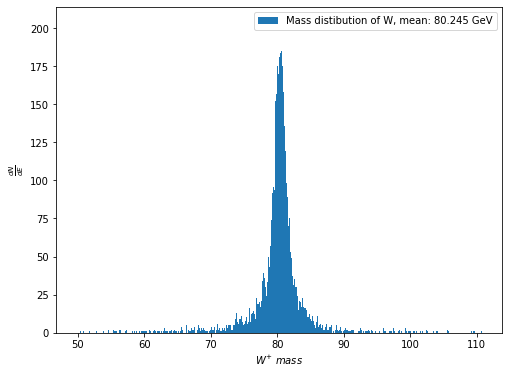

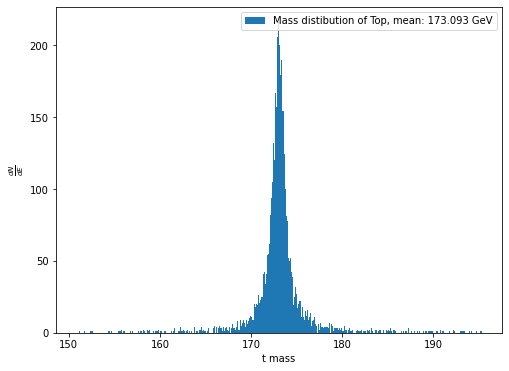

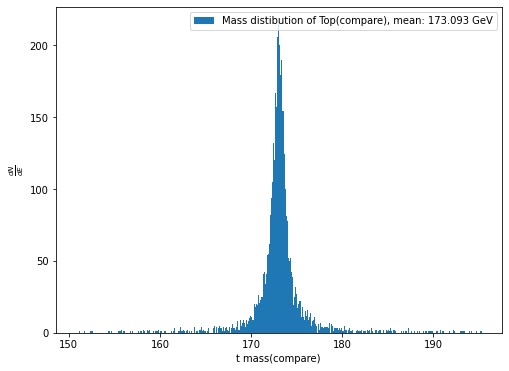

In [21]:
plot_dist(inv_W, "Mass distibution of W, mean: {0:.3f} GeV".format(np.mean( inv_W )), r"$W^{+}\ mass$", "./Pic/Dist_W.png")
plot_dist(inv_top, "Mass distibution of Top, mean: {0:.3f} GeV".format(np.mean( inv_top )), "t mass", "./Pic/Dist_top.png")
plot_dist(inv_top_compare, "Mass distibution of Top(compare), mean: {0:.3f} GeV".format(np.mean( inv_top_compare )), "t mass(compare)", "./Pic/Dist_top(compare).png")

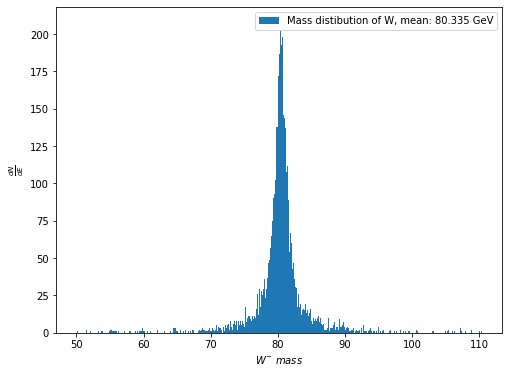

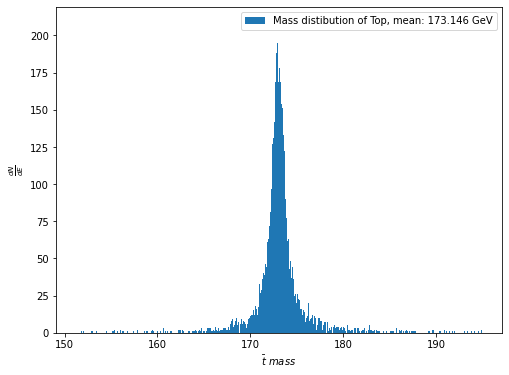

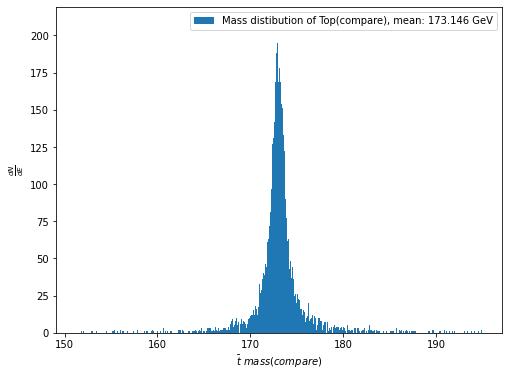

In [22]:
plot_dist(inv_W_bar, "Mass distibution of W, mean: {0:.3f} GeV".format(np.mean( inv_W_bar )), r"$W^{-}\ mass$", "./Pic/Dist_W_minus.png")
plot_dist(inv_top_bar, "Mass distibution of Top, mean: {0:.3f} GeV".format(np.mean( inv_top_bar )), r"$\bar{t}\ mass$", "./Pic/Dist_top_bar.png")
plot_dist(inv_top_bar_compare, "Mass distibution of Top(compare), mean: {0:.3f} GeV".format(np.mean( inv_top_bar_compare )), r"$\bar{t}\ mass(compare)$", "./Pic/Dist_top_bar(compare).png")

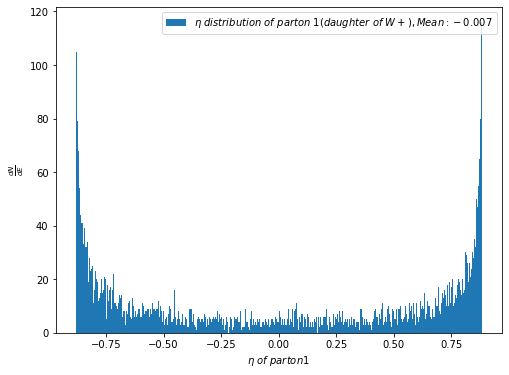

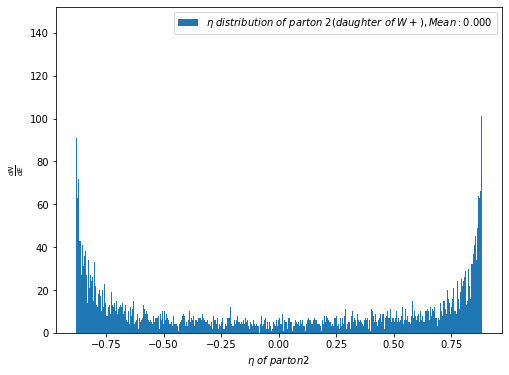

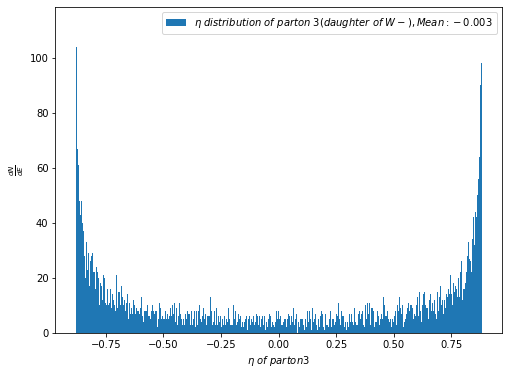

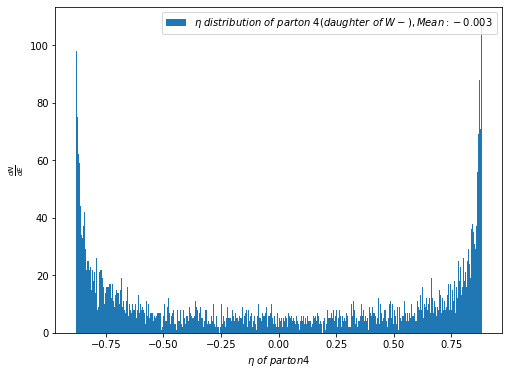

In [30]:
plot_dist(parton_1_eta, r"$\eta\ distribution\ of\ parton\ 1 (daughter\ of\ W+), Mean: {0:.3f}$".format(np.mean(parton_1_eta)), r"$\eta\ of\ parton 1$", "./Pic/Eta_dist_parton_1.png")
plot_dist(parton_2_eta, r"$\eta\ distribution\ of\ parton\ 2 (daughter\ of\ W+), Mean: {0:.3f}$".format(np.mean(parton_2_eta)), r"$\eta\ of\ parton 2$", "./Pic/Eta_dist_parton_2.png")
plot_dist(parton_3_eta, r"$\eta\ distribution\ of\ parton\ 3 (daughter\ of\ W-), Mean: {0:.3f}$".format(np.mean(parton_3_eta)), r"$\eta\ of\ parton 3$", "./Pic/Eta_dist_parton_3.png")
plot_dist(parton_4_eta, r"$\eta\ distribution\ of\ parton\ 4 (daughter\ of\ W-), Mean: {0:.3f}$".format(np.mean(parton_4_eta)), r"$\eta\ of\ parton 4$", "./Pic/Eta_dist_parton_4.png")

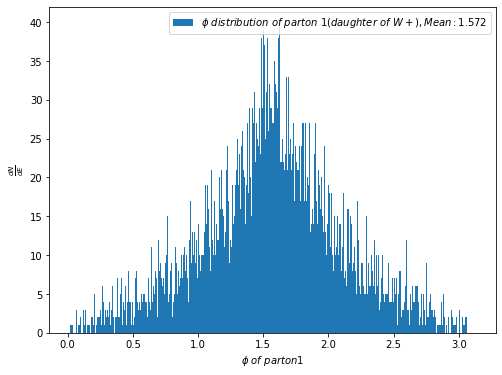

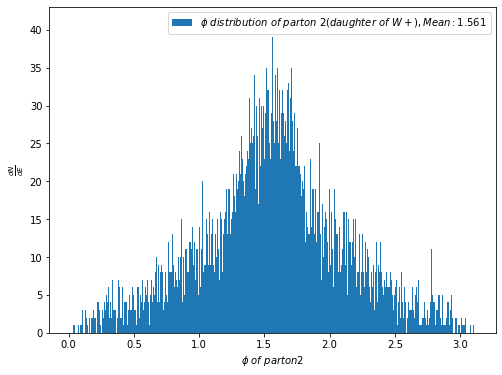

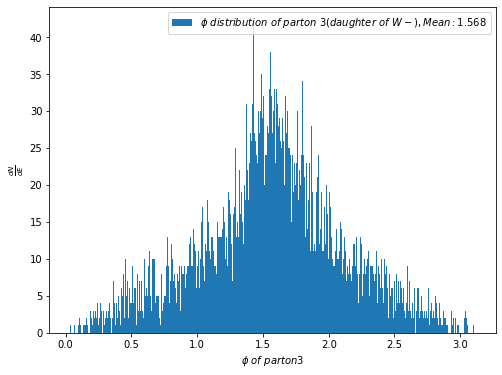

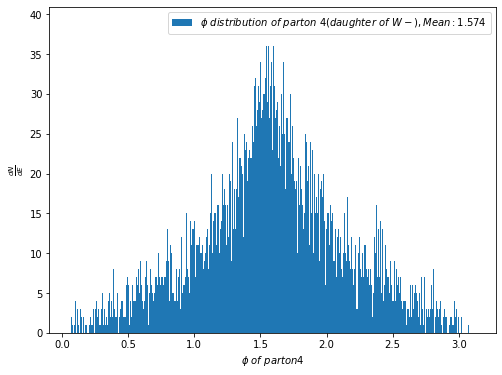

In [31]:
plot_dist(parton_1_phi, r"$\phi\ distribution\ of\ parton\ 1 (daughter\ of\ W+), Mean: {0:.3f}$".format(np.mean(parton_1_phi)), r"$\phi\ of\ parton 1$", "./Pic/Phi_dist_parton_1.png")
plot_dist(parton_2_phi, r"$\phi\ distribution\ of\ parton\ 2 (daughter\ of\ W+), Mean: {0:.3f}$".format(np.mean(parton_2_phi)), r"$\phi\ of\ parton 2$", "./Pic/Phi_dist_parton_2.png")
plot_dist(parton_3_phi, r"$\phi\ distribution\ of\ parton\ 3 (daughter\ of\ W-), Mean: {0:.3f}$".format(np.mean(parton_3_phi)), r"$\phi\ of\ parton 3$", "./Pic/Phi_dist_parton_3.png")
plot_dist(parton_4_phi, r"$\phi\ distribution\ of\ parton\ 4 (daughter\ of\ W-), Mean: {0:.3f}$".format(np.mean(parton_4_phi)), r"$\phi\ of\ parton 4$", "./Pic/Phi_dist_parton_4.png")

## root file scetion 
---

In [71]:
from particle_properties_uproot import particle_properties  #import particle properties helper function from particle_properties.py
from jet_properties_uproot import jet_properties  #import jet properties helper function from jet_properties.py

In [72]:
data  = uproot.open('./tag_1_delphes_events.root')['Delphes']
#data.show()

particle = particle_properties(data)
jet = jet_properties(data)

Length = len(particle.event)
test_length = 10

PID_W_plus = 24 
PID_W_minus = -24
PID_DOWN = 1
PID_DOWN_VAR = -1
PID_UP = 2
PID_UP_BAR = -2
PID_STRANGE = 3
PID_STRANGE_BAR = -3
PID_CHARM = 4
PID_CHARM_BAR = -4
PID_BOTTOM = 5
PID_BOTTOM_BAR = -5
PID_TOP = 6
PID_TOP_BAR = -6

top_idx = np.zeros(len(particle.event))
top_daughter_idx_1 = np.zeros(len(particle.event))
top_daughter_pid_1 = np.zeros(len(particle.event))
top_daughter_idx_2 = np.zeros(len(particle.event))
top_daughter_pid_2 = np.zeros(len(particle.event))

top_bar_idx = np.zeros(len(particle.event))
top_bar_daughter_idx_1 = np.zeros(len(particle.event))
top_bar_daughter_pid_1 = np.zeros(len(particle.event))
top_bar_daughter_idx_2 = np.zeros(len(particle.event))
top_bar_daughter_pid_2 = np.zeros(len(particle.event))

parton_array = np.zeros([ len(particle.event) , 6, 7])

In [73]:
def shift_particle_tracing(dataset, PID_d, idx):
    if (dataset.iloc[idx,6] == PID_d):
        return dataset.iloc[idx,4]

def particle_tracing(dataset, PID, STATUS):

    for i in range(len(dataset)):
        if(dataset.iloc[i,1] == STATUS and dataset.iloc[i,6] == PID ): 
            daughter_index = int(dataset.iloc[i,0])
    if( dataset.iloc[daughter_index,6] == PID ):
        shifted_particle_index = dataset.iloc[daughter_index, 4]


    while dataset.iloc[shifted_particle_index,6] == PID:
            init_shifted_particle_index = shifted_particle_index
            shifted_particle_index = shift_particle_tracing(dataset, PID, init_shifted_particle_index)       

    dauthter_idx_1 = dataset.iloc[init_shifted_particle_index, 4]
    daughter_pid_1 = dataset.iloc[dauthter_idx_1, 6]

    dauthter_idx_2 = dataset.iloc[init_shifted_particle_index, 5]
    daughter_pid_2 = dataset.iloc[dauthter_idx_2, 6]

    return init_shifted_particle_index, dauthter_idx_1, daughter_pid_1, dauthter_idx_2, daughter_pid_2


In [74]:
for i in range(len(particle.event)):
    #print("+------------------------------------------------------------------------------------------------------+")
    #print("Start parsing event : {0}\nStart to trace top quark and find its daughters.".format(i))
    top_idx[i], top_daughter_idx_1[i], top_daughter_pid_1[i], top_daughter_idx_2[i], top_daughter_pid_2[i] = particle_tracing(particle.dataframelize(i), PID_TOP, 22)
    #print("+------------------------------------------------------~-----------------------------------------------+")
    #print("Start to find top_bar quark and its daughters.")
    top_bar_idx[i], top_bar_daughter_idx_1[i], top_bar_daughter_pid_1[i], top_bar_daughter_idx_2[i], top_bar_daughter_pid_2[i] = particle_tracing(particle.dataframelize(i), PID_TOP_BAR, 22)
    #print("+------------------------------------------------------------------------------------------------------+")

In [75]:
#Input two daughter of top/top_bar and find their daughter
def quark_finder(dataset, mother_idx_1, mother_idx_2):
    
    #Specific two daughter of top
    def W_b_specifier(dataset, input_1_idx, input_2_idx):
        if dataset.iloc[int(input_1_idx),6] == PID_W_plus or dataset.iloc[int(input_1_idx),6] == PID_W_minus :
            return int(input_1_idx), int(dataset.iloc[int(input_1_idx),6]), int(input_2_idx)
        elif dataset.iloc[int(input_1_idx),6] == PID_BOTTOM or dataset.iloc[int(input_1_idx),6] == PID_BOTTOM_BAR :
            return  int(input_2_idx), int(dataset.iloc[int(input_1_idx),6]), int(input_1_idx)
        else :
            pass
            #print("Please check your data.")
    
    W_boson_idx, mother_pid, b_quark_idx = W_b_specifier(dataset, mother_idx_1, mother_idx_2)
    
    #Find the two daughters of boson
    
    daughter_1_idx = dataset.iloc[W_boson_idx, 4]
    daughter_1_pid = dataset.iloc[daughter_1_idx, 6]
    daughter_2_idx = dataset.iloc[W_boson_idx, 5]
    daughter_2_pid = dataset.iloc[daughter_2_idx, 6]

    
    if daughter_1_pid == mother_pid or daughter_2_pid == mother_pid:

        init_idx = W_boson_idx
        daughter_pid = daughter_1_pid
        if daughter_2_pid == mother_pid:
            daughter_pid = daughter_2_pid
        while daughter_pid == mother_pid :
            daughter_1_idx = dataset.iloc[int(init_idx), 4]
            daughter_2_idx = dataset.iloc[int(init_idx), 5]

            daughter_1_pid = dataset.iloc[int(daughter_1_idx), 6]
            daughter_2_pid = dataset.iloc[int(daughter_2_idx), 6]

            daughter_pid = daughter_1_pid
            init_idx = daughter_1_idx
            if daughter_2_pid == mother_pid:
                daughter_pid = daughter_2_pid
                init_idx = daughter_2_idx
            
            
            #print("Temporary daughter 1 indxe: {0}, PID: {1}".format(daughter_1_idx, daughter_1_pid))
            #print("Temporary daughter 2 indxe: {0}, PID: {1}".format(daughter_2_idx, daughter_2_pid))

    
    #print("Found daughter 1 index: {0}, PID: {1}.\nFound daughter 2 index: {2}, PID: {3}".format(daughter_1_idx, daughter_1_pid, daughter_2_idx, daughter_2_pid))
    return  b_quark_idx, daughter_1_idx, daughter_2_idx

In [76]:
for i in range(len(particle.event)):
    #print("+------------------------------------------------------------------------------------------------------+")
    #print("Start parsing event : {0}\nStart to find top quark's daughters.".format(i))
    parton_array[i][0][0], parton_array[i][1][0], parton_array[i][2][0] = quark_finder(particle.dataframelize(i), top_daughter_idx_1[i], top_daughter_idx_2[i])
    #print("+------------------------------------------------------~-----------------------------------------------+")
    #print("Start to find top_bar quark's daughters.")
    parton_array[i][3][0], parton_array[i][4][0], parton_array[i][5][0], = quark_finder(particle.dataframelize(i), top_bar_daughter_idx_1[i], top_bar_daughter_idx_2[i])
    #print("+------------------------------------------------------------------------------------------------------+")

In [ ]:
parton_pdgid = []
parton_barcode = []
parton_pt = []
parton_eta = []
parton_phi = []
parton_mass = []

In [ ]:
barcode = np.array([34, 40, 40, 17, 20, 20])
for i in range(len(particle.event)):
    _parton_pdgid = []
    _parton_barcode = []
    _parton_pt = []
    _parton_eta = []
    _parton_phi = []
    _parton_mass = []
    for j in range(0,6):
        dataset = particle.dataframelize(i)

        _parton_pdgid.append(dataset.iloc[int(parton_array[i][j][0]), 6])
        _parton_barcode.append(barcode[j])
        _parton_pt.append(dataset.iloc[int(parton_array[i][j][0]), 7])
        _parton_eta.append(dataset.iloc[int(parton_array[i][j][0]), 8])
        _parton_phi.append(dataset.iloc[int(parton_array[i][j][0]), 9])
        _parton_mass.append(dataset.iloc[int(parton_array[i][j][0]), 10])

    parton_pdgid.append(_parton_pdgid)
    parton_barcode.append(_parton_barcode)
    parton_pt.append(_parton_pt)
    parton_eta.append(_parton_eta)
    parton_phi.append(_parton_phi)
    parton_mass.append(_parton_mass)

In [ ]:
jet_pt = []
jet_eta = []
jet_phi = []
jet_mass = []
jet_btag = []

for i in range(len(jet.event)):
    jet_pt_tmp = []
    jet_eta_tmp = []
    jet_phi_tmp = []
    jet_mass_tmp = []
    jet_btag_tmp = []
    for j in range(len(jet.pt[i])):
        if marker_jet[i][j] == 1:
            jet_pt_tmp.append(jet.pt[i][j])
            jet_eta_tmp.append(jet.eta[i][j])
            jet_phi_tmp.append(jet.phi[i][j])
            jet_mass_tmp.append(jet.mass[i][j])
            jet_btag_tmp.append(jet.btag[i][j])
                
    jet_pt.append(jet_pt_tmp)
    jet_eta.append(jet_eta_tmp)
    jet_phi.append(jet_phi_tmp)
    jet_mass.append(jet_mass_tmp)
    jet_btag.append(jet_btag_tmp)
